In [2]:
import os
os.chdir("..")
os.getcwd()


'C:\\work\\nov2\\SuRVoS2'

# Example Notebook

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [4]:
import os

import numpy as np
import pandas as pd
import json
import os
import yaml
from loguru import logger
from matplotlib import pyplot as plt
from survos2 import survos

from survos2.frontend.control import Launcher
from survos2.model import DataModel
from survos2.improc.utils import DatasetManager
from survos2.server.pipeline import run_workflow
from survos2.server.state import cfg
from survos2.server.pipeline import view_dataset
from survos2.frontend.nb_utils import start_server, stop_server

# Start Server

In [40]:
port = 7765

In [26]:

server_process = start_server(port)

# Set workspace

In [6]:
workspace_name = 'epfl512'
workspace_name = 'huntcrop2' # set workspace here

DataModel.g.current_workspace = workspace_name
DataModel.g.current_session = 'default'

In [41]:
server_uri = '127.0.0.1:' + str(port)

In [42]:
Launcher.g.set_remote(server_uri)
DataModel.g.server_uri = server_uri

INFO - Launcher setting remote to 127.0.0.1:7765  - survos2.frontend.control.launcher:set_remote:82
INFO - Contacting endpoint http://127.0.0.1:7765/  - survos2.survos:remote_client:104


In [46]:
#DataModel.g.server_uri

In [9]:
#stop_server(server_process)

# Inspect workspace

In [10]:
survos.run_command('workspace', 'list_datasets',  workspace=workspace_name)

INFO - Contacting endpoint http://127.0.0.1:8022/  - survos2.survos:remote_client:104


(['data'], False)

In [11]:
Launcher.g.run('workspace', 'metadata',  workspace=workspace_name, dataset="data", json_transport=True)

{'__data__': {'chunk_grid': [1, 1, 1],
  'chunk_size': [186, 85, 89],
  'dtype': 'float32',
  'fillvalue': 0,
  'shape': [186, 85, 89]}}

In [43]:
Launcher.g.run('features', 'existing', workspace=workspace_name)

{'001_raw': {'kind': 'raw',
  'name': '001 Raw',
  'source': '__data__',
  'id': '001_raw'},
 '002_gaussian_norm': {'kind': 'gaussian_norm',
  'name': '002 Gaussian Norm',
  'sigma': [4.0, 4.0, 4.0],
  'source': '__data__',
  'id': '002_gaussian_norm'},
 '003_wavelet': {'hard': True,
  'kind': 'wavelet',
  'level': 3,
  'name': '003 Wavelet',
  'source': '__data__',
  'threshold': 123.52,
  'wavelet': 'db4',
  'id': '003_wavelet'},
 '004_gaussian_blur': {'kind': 'gaussian_blur',
  'name': '004 Gaussian Blur',
  'sigma': 1.0,
  'source': '__data__',
  'id': '004_gaussian_blur'},
 '005_raw': {'kind': 'raw', 'name': '005 Raw', 'id': '005_raw'},
 '006_laplacian': {'kernel_size': 1,
  'kind': 'laplacian',
  'name': '006 Laplacian',
  'sigma': 1,
  'sigma_ratio': 2.0,
  'source': '__data__',
  'id': '006_laplacian'},
 '007_gaussian_norm': {'kind': 'gaussian_norm',
  'name': '007 Gaussian Norm',
  'sigma': [6.0, 6.0, 6.0],
  'source': '__data__',
  'id': '007_gaussian_norm'},
 '008_gaussian_c

In [37]:
Launcher.g.run('annotations', 'get_levels', workspace=workspace_name)

[{'kind': 'level',
  'labels': {'2': {'color': '#781aa0',
    'idx': 2,
    'name': 'Label',
    'visible': True},
   '3': {'color': '#288790', 'idx': 3, 'name': 'Label', 'visible': True}},
  'modified': [1],
  'name': '001 Level',
  'id': '001_level'},
 {'kind': 'level',
  'labels': {'2': {'color': '#781aa0', 'idx': 2, 'name': '1', 'visible': True},
   '3': {'color': '#288790', 'idx': 3, 'name': '2', 'visible': True}},
  'modified': [1],
  'name': '002 Level',
  'id': '002_level'},
 {'kind': 'level',
  'labels': {'2': {'color': '#781aa0', 'idx': 2, 'name': '2', 'visible': True},
   '3': {'color': '#288790', 'idx': 3, 'name': '3', 'visible': True}},
  'modified': [0],
  'name': '003 Level',
  'id': '003_level'},
 {'kind': 'level',
  'labels': {'2': {'color': '#781aa0', 'idx': 2, 'name': '2', 'visible': True},
   '3': {'color': '#288790', 'idx': 3, 'name': '3', 'visible': True}},
  'modified': [0],
  'name': 'Deep Learning Training',
  'id': '004_level'}]

In [42]:
Launcher.g.run('superregions', 'existing', uri=server_uri, workspace=workspace_name)

{'001_supervoxels': {'compactness': 0.2,
  'kind': 'supervoxels',
  'n_segments': 1407,
  'name': '001 Supervoxels',
  'out_dtype': 'uint32',
  'source': '004_gaussian_blur',
  'spacing': [1.0, 1.0, 1.0],
  'id': '001_supervoxels'}}

In [14]:
Launcher.g.run('pipelines', 'existing', uri=server_uri, workspace=workspace_name)

{'001_rasterize_points': {'kind': 'rasterize_points',
  'name': '001 Rasterize Points',
  'id': '001_rasterize_points'},
 '002_label_postprocess': {'kind': 'label_postprocess',
  'name': '002 Label Postprocess',
  'id': '002_label_postprocess'},
 '003_superregion_segment': {'anno_id': '001_level',
  'classifier_params': {'clf': 'Ensemble',
   'learning_rate': 1.0,
   'max_depth': 15,
   'n_estimators': 100,
   'n_jobs': 10,
   'proj': 'None',
   'subsample': 1.0,
   'type': 'xgb'},
  'classifier_type': 'Ensemble',
  'confidence': False,
  'constrain_mask': 'None',
  'feature_ids': ['001_raw', '002_gaussian_norm', '003_wavelet'],
  'kind': 'superregion_segment',
  'lam': 0.0,
  'name': '003 Superregion Segment',
  'projection_type': 'None',
  'refine': True,
  'region_id': '001_supervoxels',
  'source': '001_level',
  'workspace': 'huntcrop2',
  'id': '003_superregion_segment'},
 '004_train_multi_axis_cnn': {'anno_id': [['003_level', '003 Level']],
  'feature_id': [['001_raw', '001 Raw'

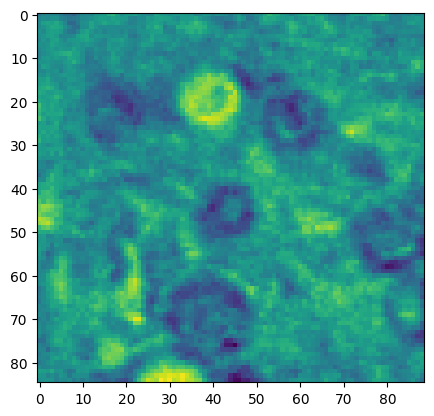

In [13]:
feature_array = view_dataset('001_raw', 'features', 50)

In [15]:
src = DataModel.g.dataset_uri('003_superegion_segment', group="pipelines")
src

'survos://default@huntcrop2:pipelines/003_superegion_segment'

In [16]:
dst = src

In [45]:
params= {'src': src,
 'dst': dst,
 'anno_id': '005_level',
 'classifier_params': {'clf': 'ensemble',
                       'learning_rate': 1.0,
                       'max_depth': 15,
                       'n_estimators': 100,
                       'n_jobs': 10,
                       'subsample': 1.0,
                       'type': 'rf'},
 'classifier_type': 'Ensemble',
 'confidence': False,
 'constrain_mask': 'None',
 'feature_ids': ['001_raw', '002_gaussian_norm', '003_wavelet'],
 'lam': 0.0,
 'projection_type': 'None',
 'refine': True,
 'region_id': '001_supervoxels',
 'workspace': 'huntcrop2'}

In [46]:
Launcher.g.run('pipelines', 'superregion_segment', json_transport=True, **params)

{'anno_id': '005_level',
 'feature_id': [['001_raw', '001 Raw']],
 'kind': 'train_multi_axis_cnn',
 'multi_ax_train_params': {'bce_dice_alpha': '0.75',
  'bce_dice_beta': '0.25',
  'cyc_frozen': 1,
  'cyc_unfrozen': 0,
  'encoder_type': 'resnet34',
  'loss_criterion': 'DiceLoss',
  'model_type': 'U_Net',
  'patience': '3'},
 'name': '004 Train Multi Axis Cnn',
 'source': '004_train_multi_axis_cnn',
 'workspace': 'huntcrop2',
 'constrain_mask': 'None',
 'region_id': '001_supervoxels',
 'lam': 0.0,
 'refine': True,
 'classifier_type': 'Ensemble',
 'projection_type': 'None',
 'confidence': False,
 'classifier_params': {'clf': 'Ensemble',
  'learning_rate': 1.0,
  'max_depth': 15,
  'n_estimators': 100,
  'n_jobs': 10,
  'subsample': 1.0,
  'type': 'rf',
  'proj': 'None'},
 'feature_ids': ['001_raw', '002_gaussian_norm', '003_wavelet'],
 'id': '004_train_multi_axis_cnn'}

In [36]:
src = DataModel.g.dataset_uri('004_train_multi_axis_cnn', group="pipelines")
src

'survos://default@huntcrop2:pipelines/004_train_multi_axis_cnn'

In [37]:
dst = src

In [49]:
params = {
  'src': src,
  'dst': dst,  
  'anno_id': [['003_level', '003 Level']],
  'feature_id': [['001_raw', '001 Raw']],
  'kind': 'train_multi_axis_cnn',
  'multi_ax_train_params': {'bce_dice_alpha': '0.75',
   'bce_dice_beta': '0.25',
   'cyc_frozen': 1,
   'cyc_unfrozen': 0,
   'encoder_type': 'resnet34',
   'loss_criterion': 'DiceLoss',
   'model_type': 'U_Net',
   'patience': '3'},
  'name': '004 Train Multi Axis Cnn',
  'source': '001_raw',
  'workspace': [['huntcrop2', 'huntcrop2']],
  'id': '004_train_multi_axis_cnn'}

In [50]:
Launcher.g.run('pipelines', 'train_multi_axis_cnn', json_transport=True, **params)

HTTPError: 500 Internal Server Error occured for url: pipelines/train_multi_axis_cnn

In [39]:
Launcher.g.run'annotations', 'get_volume', uri=server_uri, workspace=workspace_name, src="survos://default@:annotations/006_level")

INFO - Contacting endpoint http://127.0.0.1:8046/  - survos2.survos:remote_client:104


HTTPError: 500 Internal Server Error occured for url: annotations/get_volume

In [34]:
params = {
    "src" : "survos://default@:annotations/002_level", 
    "slice_idx" : 10,
    "order" : (1,2,3),
    "workspace": workspace_name,
}

In [82]:
r = Launcher.g.run('annotations', 'get_slice', src="survos://default@huntcrop2:annotations/002_level", slice_idx=10, order=(0,1,2)) 

In [22]:
survos.run_command('analyzer', 'label_analyzer', uri='127.0.0.1:8000', workspace=workspace_name)

INFO - Contacting endpoint http://127.0.0.1:8000/  - survos2.survos:remote_client:104


({'detail': [{'loc': ['body', 'src'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'dst'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'workspace'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'mode'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'pipelines_id'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'analyzers_id'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'annotations_id'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'feature_id'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'split_ops'],
    'msg': 'field required',
    'type': 'value_error.missing'},
   {'loc': ['body', 'background_label'],
    'msg': 'field required',
    'type': 'value_error.missing'}

In [30]:
params = {'src': 'survos://default@vf_tightcrop_A:014_erosion', 
'dst': '004_binary_classifier', 
'proposal_id': '014_erosion', 
'mask_id': '013_simple_invert', 
'feature_id': '001_raw', 
'object_id': 'objects/008_points', 
'background_id': 'objects/011_points', 
'area_max': 1e9, 
'area_min': 0, 
'bvol_dim': ('32', '32', '32'), 
'num_before_masking': 500, 
'score_thresh': 0.95, 
'model_fullname': 'None', 
'json_transport': True, 
'workspace': 'vf_tightcrop_A'}

In [20]:
params = {'src': 'survos://default@vf_brcrop1:001_raw', 
'dst': '001_binary_classifier', 
'proposal_id': '005_raw', 
'mask_id': '004_rescale', 
'feature_id': '001_raw', 
'object_id': 'objects/001_points', 
'background_id': 'objects/005_points', 
'area_max': 1e10, 
'area_min': 0, 
'bvol_dim': ('32', '32', '32'), 
'score_thresh': 0.5, 
'model_fullname': 'None', 
'json_transport': True, 
'workspace': 'huntcrop2'}

In [21]:
Launcer.run('analyzer', 
                   'binary_classifier', 
                   uri='127.0.0.1:8000', 
                    **params)

INFO - Contacting endpoint http://127.0.0.1:8000/  - survos2.survos:remote_client:104


HTTPError: 500 Internal Server Error occured for url: analyzer/binary_classifier

In [ ]:
# perform custom processing

In [9]:
import scipy

In [10]:
processed_image = scipy.ndimage.gaussian_laplace(feature_array, sigma=3)

In [11]:
processed_image.shape

(128, 1450, 1450)

In [12]:
processed_image

array([[[ 1.09386491e-02,  9.62226000e-03,  6.89124595e-03, ...,
         -6.54761028e-03, -8.90335348e-03, -1.02451630e-02],
        [ 1.08007686e-02,  9.48126242e-03,  6.79443451e-03, ...,
         -5.17859636e-03, -7.13202171e-03, -8.26590322e-03],
        [ 1.03758536e-02,  9.06769931e-03,  6.49521127e-03, ...,
         -2.85482896e-03, -4.15769871e-03, -4.96037677e-03],
        ...,
        [ 5.09587117e-05,  9.81304911e-04,  2.12428579e-03, ...,
         -6.23097783e-03, -8.61929450e-03, -9.92689468e-03],
        [ 5.20830741e-04,  1.44247245e-03,  2.53977906e-03, ...,
         -4.87286691e-03, -7.00286776e-03, -8.18461739e-03],
        [ 7.49568688e-04,  1.63736928e-03,  2.66417325e-03, ...,
         -3.82052478e-03, -5.72856981e-03, -6.79557398e-03]],

       [[ 1.13522429e-02,  9.81980655e-03,  6.79106079e-03, ...,
         -6.72454294e-03, -8.64406675e-03, -9.72354598e-03],
        [ 1.10512469e-02,  9.54690762e-03,  6.61666412e-03, ...,
         -5.37819695e-03, -6.93625398e

In [19]:
from survos2.frontend.nb_utils import add_feature

In [20]:
add_feature(processed_image, "gaussian_laplace", workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2dd946cb30>  - survos2.survos:run_command:111
DEBUG - get request to client: create  - survos2.survos:run_command:114
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]

Created new feature with id: 010_raw


# Modify annotations

In [13]:
survos.run_command('annotations', 'get_levels', uri=None, workspace=workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2c708993b0>  - survos2.survos:run_command:111
DEBUG - get request to client: get_levels  - survos2.survos:run_command:114
DEBUG - Local client gave response Response(data={'data': [{'kind': 'level', 'labels': {'2': {'color': '#f57900', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#cc0000', 'idx': 3, 'name': 'Label', 'visible': True}}, 'modified': [1], 'name': '001 Level', 'id': '001_level'}, {'kind': 'level', 'labels': {'2': {'color': '#75507b', 'idx': 2, 'name': 'Label', 'visible': True}, '3': {'color': '#73d216', 'idx': 3, 'name': 'Label', 'visible': True}}, 'modified': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'name': '002 Level', 'id': '002_level'}, 

([{'kind': 'level',
   'labels': {'2': {'color': '#f57900',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#cc0000', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [1],
   'name': '001 Level',
   'id': '001_level'},
  {'kind': 'level',
   'labels': {'2': {'color': '#75507b',
     'idx': 2,
     'name': 'Label',
     'visible': True},
    '3': {'color': '#73d216', 'idx': 3, 'name': 'Label', 'visible': True}},
   'modified': [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    

INFO - running survos_from_uri on survos:// uri  - survos2.io:survos_from_uri:166
DEBUG - Calling Workspace() Init with workspace name: vf_3003_main  - survos2.io:survos_from_uri:177
INFO - Closed: <survos2.model.dataset.Dataset object at 0x2b2dd94b0070>  - survos2.improc.utils:__exit__:568


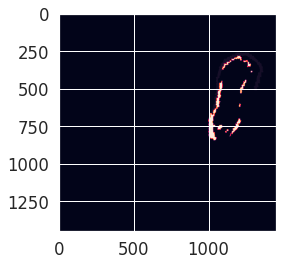

In [24]:
anno_001_level = view_dataset('001_level', 'annotations',66)
anno_001_level = anno_001_level & 15 # anno images have to be processed with this command (because of the way history works)

In [25]:
np.unique(anno_001_level)

array([0, 1], dtype=uint32)

In [27]:
anno_001_level_mod = anno_001_level + 2 #shift all the labels by 1

In [28]:
np.unique(anno_001_level_mod)

array([2, 3], dtype=uint32)

In [26]:
from survos2.frontend.nb_utils import add_anno

In [29]:
add_anno(anno_001_level_mod, "Modified Level", workspace_name)

DEBUG - Using client <hug.use.Local object at 0x2b2d53a71270>  - survos2.survos:run_command:111
DEBUG - get request to client: add_level  - survos2.survos:run_command:114
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
DEBUG - format '{:03d}_{}' -> ' *([-+ ]?\\d{1,3}|[-+ ]?0[xX][0-9a-fA-F]{1,3}|[-+ ]?0[bB][01]{1,3}|[-+ ]?0[oO][0-7]{1,3})_(.+?)'  - parse:__init__:837
INFO - Creating dataset on /dls/science/groups/das/SuRVoS/s2/data/avery/vf_3003_main/default/annotations/005_level [128, 1450, 1450] uint32 None 10  - survos2.model.dataset:create:246
DEBUG - <survos2.model.dataset.Dataset object

Created new annotation with id: 005_level
